<a href="https://colab.research.google.com/github/anhhao04/NguyenAnhHao-20104006.github.io/blob/main/Ti%E1%BB%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Money

/content/drive/MyDrive/Colab Notebooks/Money


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Money/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 120 images belonging to 4 classes.


In [5]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Money/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 40 images belonging to 4 classes.


In [6]:
x_train.class_indices

{'10000': 0, '100000': 1, '20000': 2, '50000': 3}

In [7]:
validation.class_indices

{'10000': 0, '100000': 1, '20000': 2, '50000': 3}

In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
4/4 [==============================] - 101s 23s/step - loss: 6.0650 - accuracy: 0.2750 - val_loss: 1.4636 - val_accuracy: 0.2500
Epoch 2/50
4/4 [==============================] - 24s 5s/step - loss: 1.3332 - accuracy: 0.3167 - val_loss: 1.0780 - val_accuracy: 0.5750
Epoch 3/50
4/4 [==============================] - 24s 6s/step - loss: 0.9551 - accuracy: 0.5583 - val_loss: 0.7467 - val_accuracy: 0.5250
Epoch 4/50
4/4 [==============================] - 23s 6s/step - loss: 0.8845 - accuracy: 0.6500 - val_loss: 0.7129 - val_accuracy: 0.6250
Epoch 5/50
4/4 [==============================] - 23s 6s/step - loss: 0.7421 - accuracy: 0.6833 - val_loss: 0.6508 - val_accuracy: 0.6500
Epoch 6/50
4/4 [==============================] - 24s 5s/step - loss: 0.5512 - accuracy: 0.7500 - val_loss: 0.3898 - val_accuracy: 0.8000
Epoch 7/50
4/4 [==============================] - 23s 5s/step - loss: 0.4104 - accuracy: 0.8333 - val_loss: 0.2668 - val_accuracy: 0.9250
Epoch 8/50
4/4 [================

In [10]:
Score=model.evaluate(x_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.004425215534865856
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

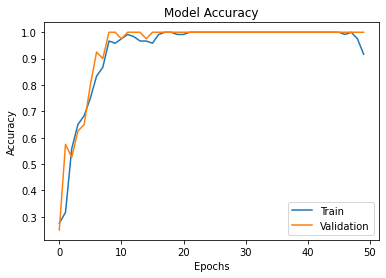

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [12]:
model.save("Tiền.h5")

In [13]:
model_CNN=load_model('Tiền.h5')

In [14]:
test="/content/drive/MyDrive/Colab Notebooks/Money/Test"

1/1 [==============================] - 0s 183ms/step
10000


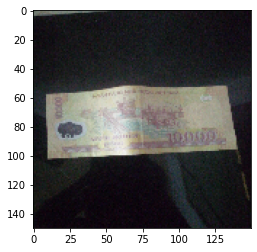

1/1 [==============================] - 0s 57ms/step
50000


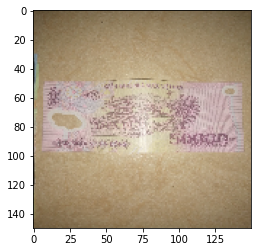

1/1 [==============================] - 0s 70ms/step
100000


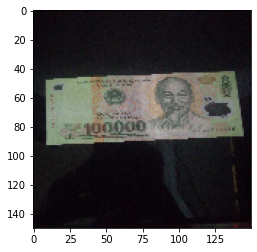

1/1 [==============================] - 0s 49ms/step
100000


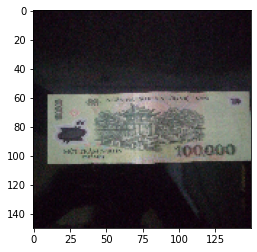

1/1 [==============================] - 0s 48ms/step
50000


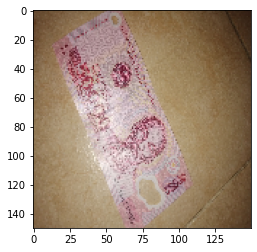

1/1 [==============================] - 0s 66ms/step
20000


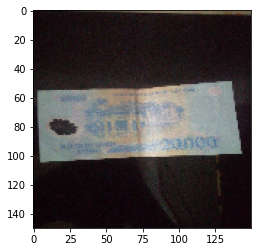

1/1 [==============================] - 0s 49ms/step
20000


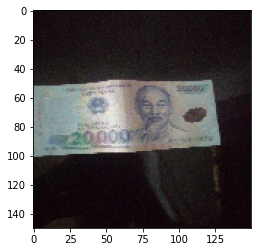

1/1 [==============================] - 0s 48ms/step
10000


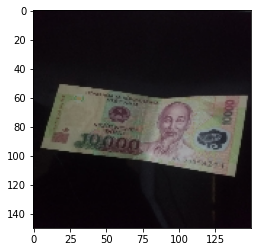

In [15]:
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='10000'
  if round(result[0][1])==1:
    prediction='100000'
  if round(result[0][2])==1:
    prediction='20000'
  if round(result[0][3])==1:
    prediction='50000'
  print(prediction)
  plt.show()